In [50]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [42]:

data = pd.read_csv(load_boston()['filename'],skiprows=1)

In [43]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [44]:
# print(load_boston()['DESCR'])

* CRIM  - уровень преступности на душу населения в разбивке по городам
* ZN - доля жилой земли, зонированной на участки площадью более25 000 кв. м.фут.
* INDUS  - доля акров нефинансового бизнеса в расчете на один город
* CHAS - Фиктивная переменная Чарльз- Ривер (= 1, Если тракт граничит с рекой; 0 в противном случае)
*  NOX -концентрация оксидов азота (частей на 10 млн
* RM - среднее количество комнат в одном жилом помещении
* AGE - доля занятых собственниками объектов, построенных до 1940 года
* DIS  - взвешенные расстояния до пяти бостонских центров занятости
* RAD - индекс доступности радиальных магистралей
* TAX - ставка налога на недвижимость с полной стоимостью за $10 000
* PTRATIO - соотношение учеников и учителей по городам
* B - 1000 (Bk - 0.63)^2, где Bk- доля чернокожих по городам 
* LSTAT - % более низкий статус населения
* MEDV  -  медианная стоимость домов, занятых собственниками, в 1000 долларов США

In [48]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [51]:
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']] # 
y = data['MEDV'] 
reg = LinearRegression().fit(X, y) 

print('Weights: {}'.format(reg.coef_)) 
print('Bias: {}'.format(reg.intercept_)) 

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y))) 

# Ошибка 3,27 (стремимся к 0), Вес маленький по параметрам (надо 100)

Weights: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Bias: 36.459488385090005
Error: 3.270862810900314


1. Работа с выбросами 
1.1 CRIM - убрали 'CRIM >  30'(8 шт)
  1.2.ZN убрали - > 95 (5шт)
2. Убрали столбец DIS, как коррелирующий с NOX  
3. Вернули столбец ( потому что ошибка с ним меньше)

In [54]:
data.info()
# 506 строк , нет пропущенных значений, все значения количественные, 
#  по названию мы понимаем, что CHAS - это номинативная, принимает только два значения 0 или 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [55]:
# Посмотрим статистические данные 
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [56]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

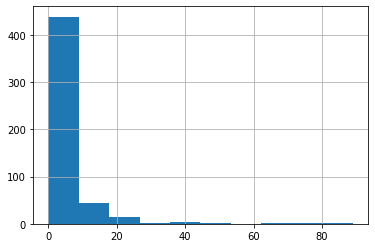

In [57]:
data['CRIM'].hist()

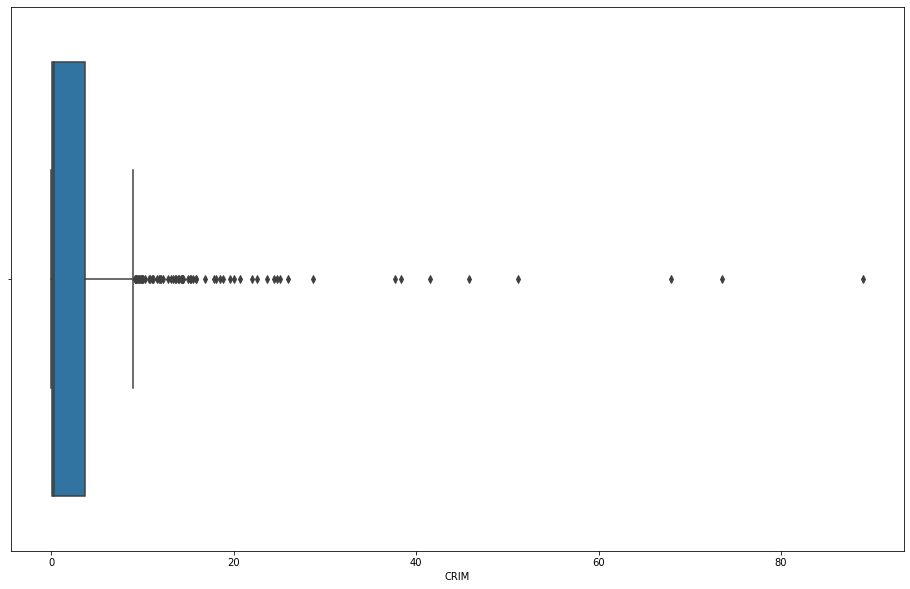

In [58]:
plt.figure(figsize=(16,10))
sns.boxplot(x=data['CRIM'])

In [59]:
#  Посмотрим количество элементов больше 40, даже можно больше 30
data.query('CRIM >  30')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
427,37.6619,0.0,18.1,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,10.9


In [60]:
len(data.query('CRIM > 30'))

8

In [61]:
data[data['CRIM'] > 30][['CRIM', 'B']].corr()

#  Посмотрела есть ли корреляция между двумя переменными- нет.

,CRIM,B
CRIM,1.000000,0.223612
B,0.223612,1.000000


In [62]:
data[data['CRIM'] > 30][['CRIM', 'B']].corr(method='pearson')

,CRIM,B
CRIM,1.000000,0.223612
B,0.223612,1.000000


In [63]:
# выделенные данные очень схожи, кроме позиции 410. Я запишу их в отдельный дф. 
data_CRIM_30 = data.query('CRIM >  30')
len(data_CRIM_30)

8

In [64]:
data_CRIM_30.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0


In [65]:
# Убираем из нашего дф строки , где данные CRIM >  30'
data = data.query('CRIM <  30')

In [66]:
len(data)

498

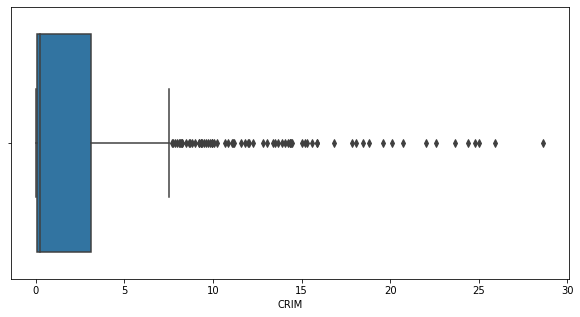

In [67]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data['CRIM'])

In [68]:
# "аппетит приходит во время еды", но нет , пока не будем убирать
len(data.query('CRIM > 17'))

15

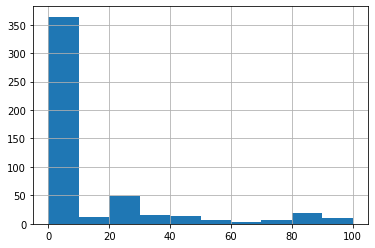

In [69]:
data['ZN'].hist()

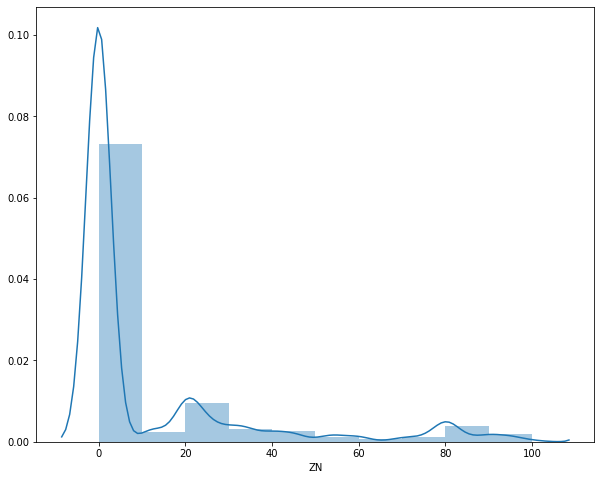

In [70]:
plt.figure(figsize=(10, 8))
sns.distplot(data['ZN'], bins=10)

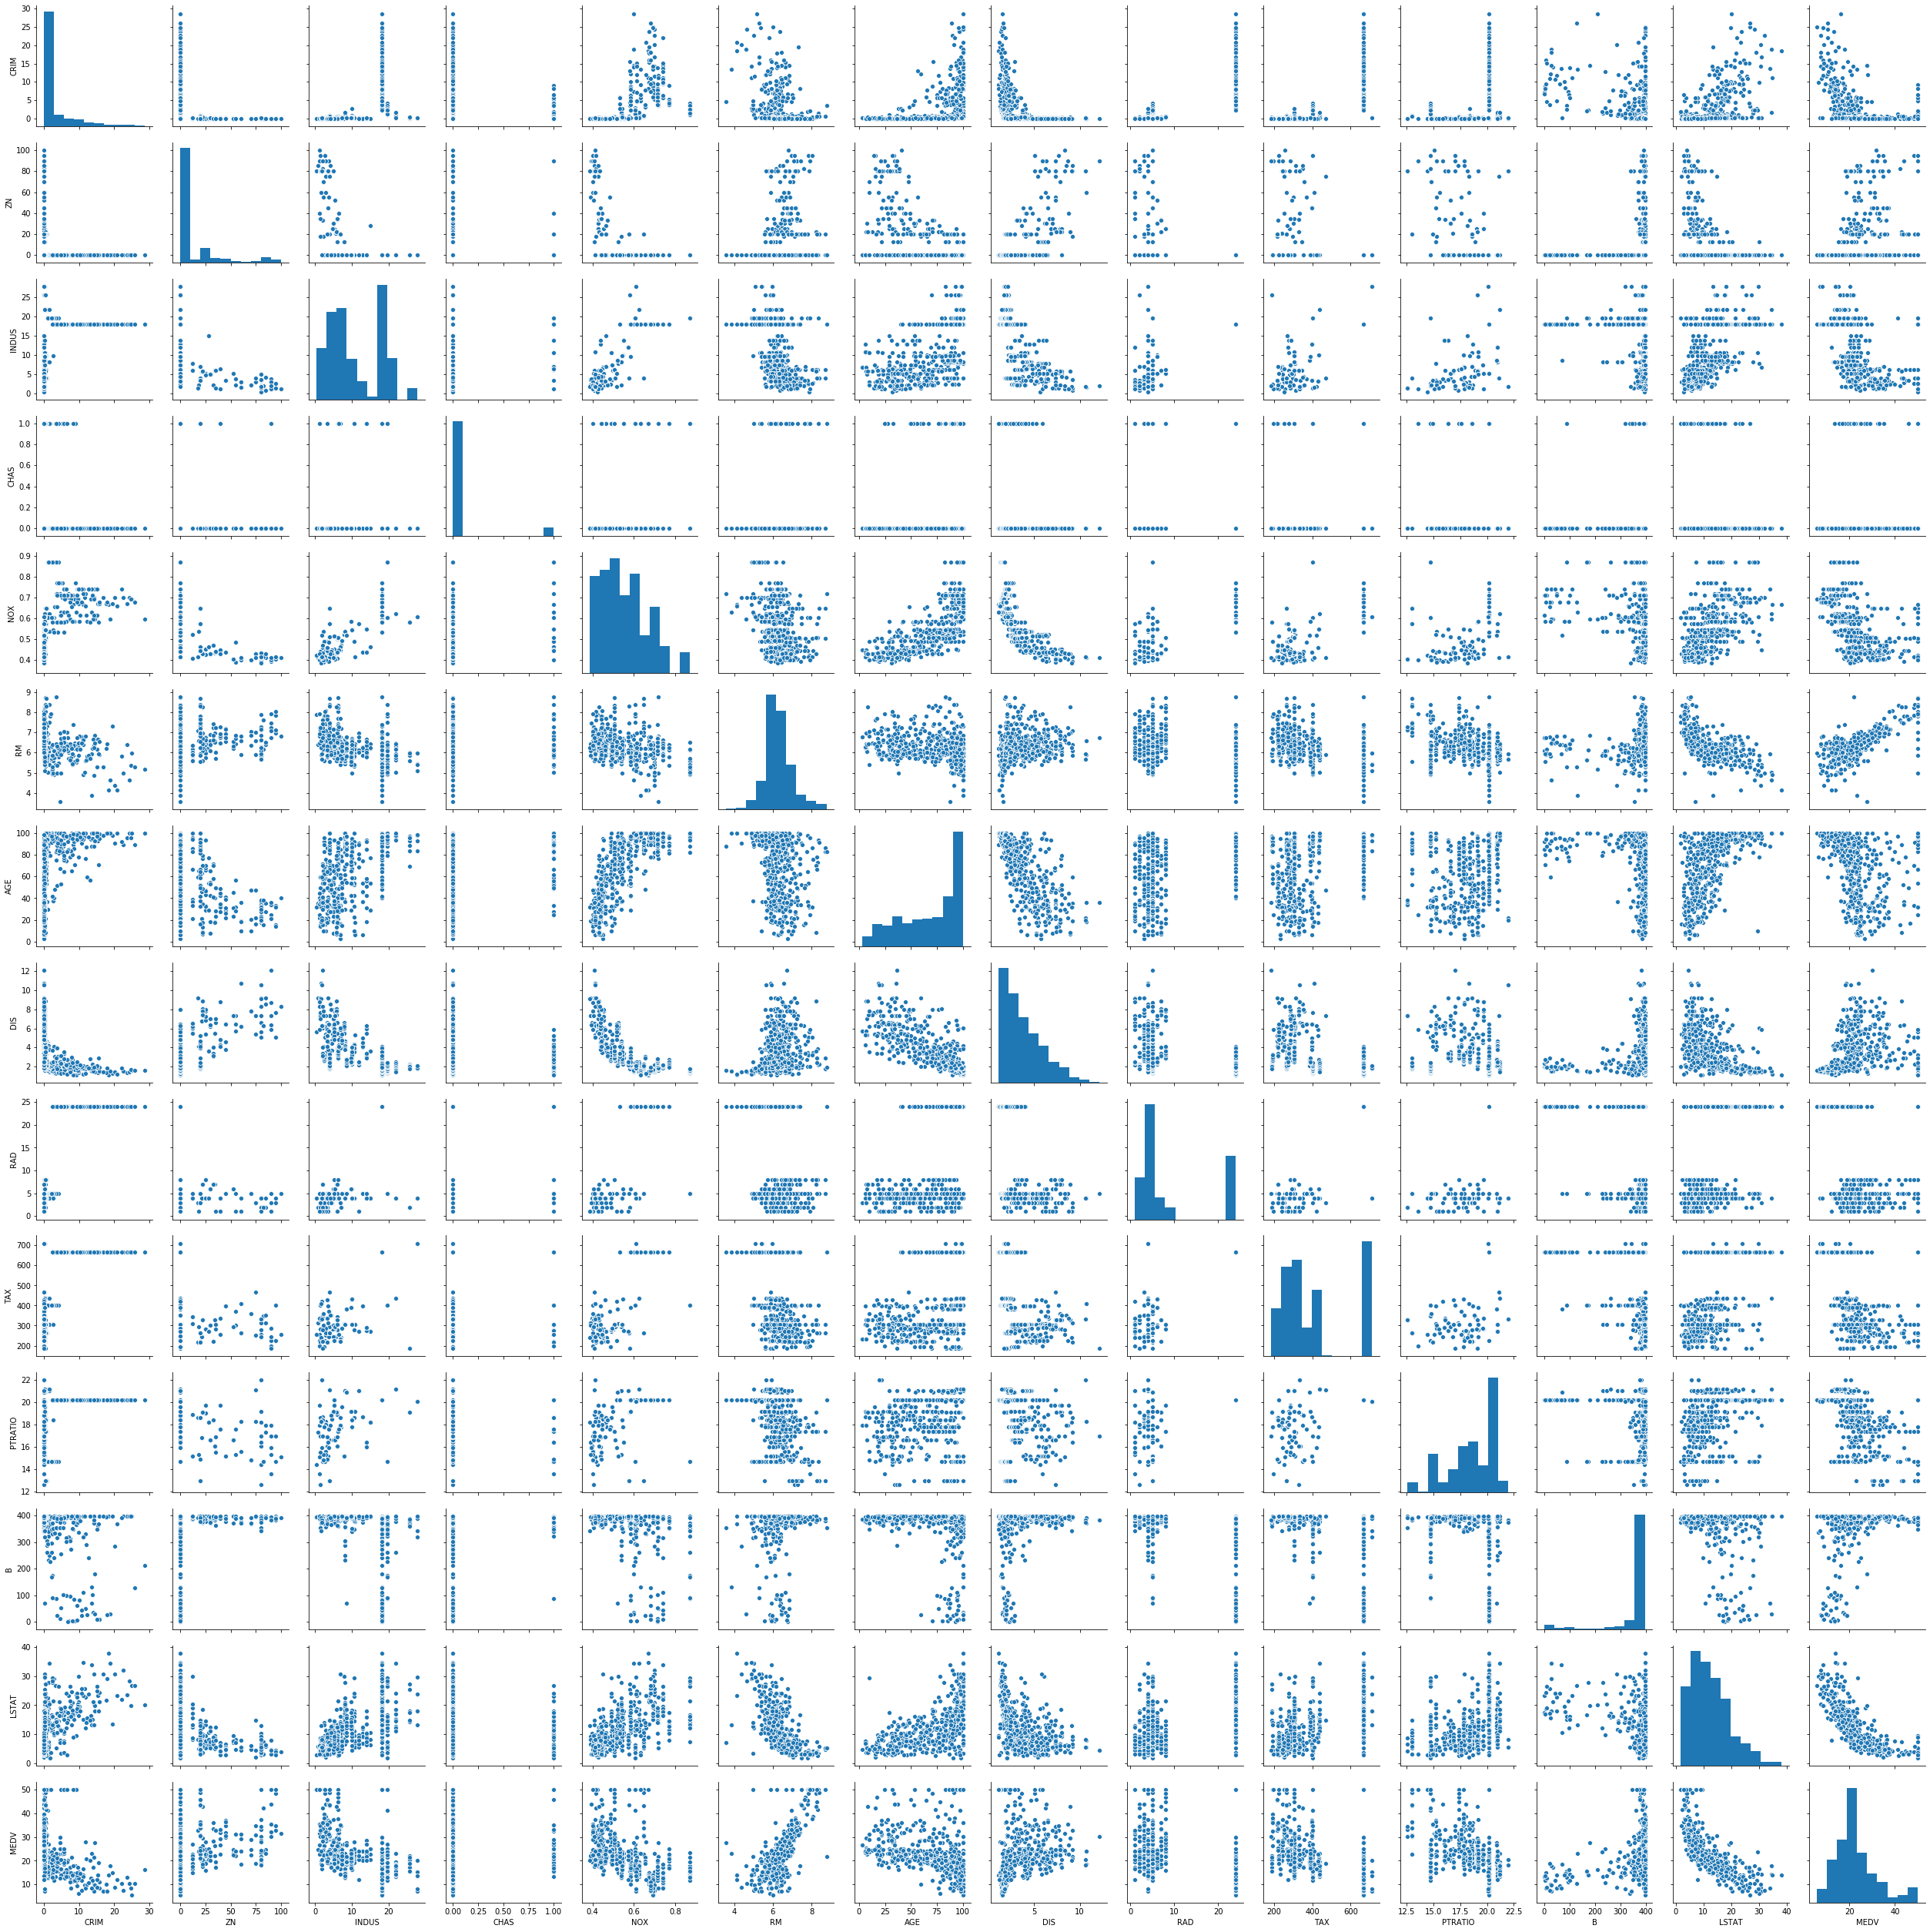

In [23]:
sns.pairplot(data)

# Не удобный получился для анализа 

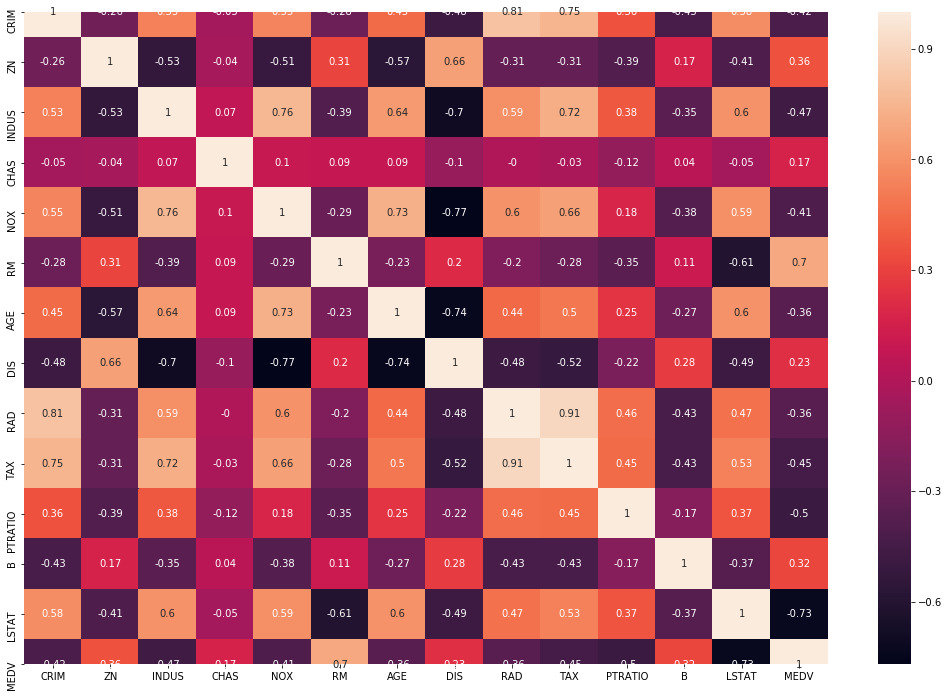

In [24]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(18,12)) 
sns.heatmap(data=correlation_matrix, annot=True)

* На мой взгляд корреляция между DIS и NOX  достаточно сильная -0,77. И если посмотреть как они коррелируют с остальными данныеми, влияние похожее (только обратное). У меня есть желание оставить одну из двух переменных, если учесть, что корреляция NOX и MEDV выше, чем DIS и MEDV, то я оставлю NOX. Хотя, конечно , страно- зависимость меду расстоянием до бостонских центров занятости и концентрацией оксида азота, но думаю убрать надо. 

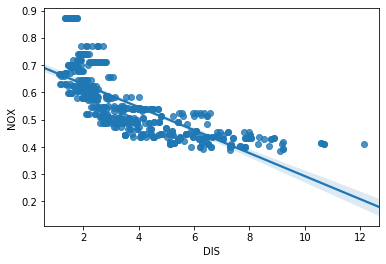

In [71]:
sns.regplot(x= data['DIS'], y= data['NOX'])
#  Мы видим обратную линейную зависимость. 

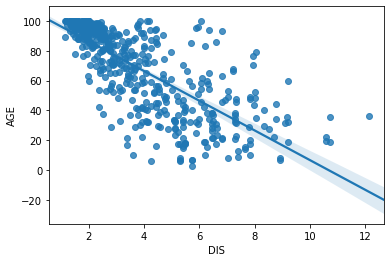

In [72]:
sns.regplot(x= data['DIS'], y= data['AGE'])
#  Мы видим обратную линейную зависимость. -0,74

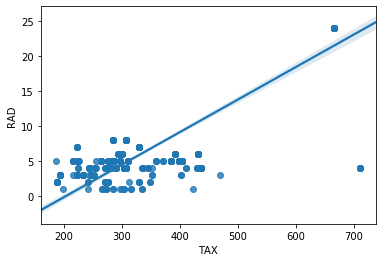

In [73]:
sns.regplot(x= data['TAX'], y= data['RAD'])
# Показалось линейная зависимость, но оставим это на потом, когда улучшим данные.

In [74]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [75]:
data = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']]

In [76]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,3,222,18.7,396.90,5.33,36.2


In [77]:
# Поработаем над ZN
data['ZN'].value_counts()

# Мне кажется странным значение более 95  - доли жилой земли. Надо их посмотреть

0.0      364
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

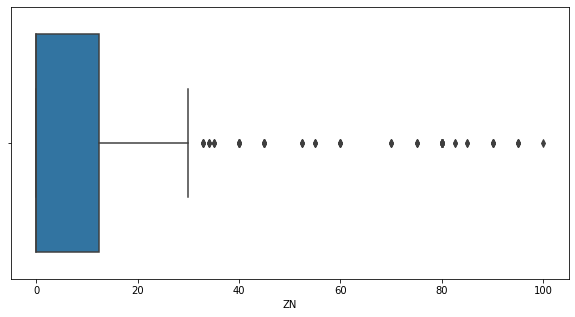

In [78]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data['ZN'])

In [79]:
data.query('ZN >= 95')
# Аномалии я здесь не вижу, просто выбросы. Удалим эти 5 значений 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,MEDV
57,0.01432,100.0,1.32,0,0.4110,6.816,40.5,5,256,15.1,392.90,3.95,31.6
199,0.03150,95.0,1.47,0,0.4030,6.975,15.3,3,402,17.0,396.90,4.56,34.9
200,0.01778,95.0,1.47,0,0.4030,7.135,13.9,3,402,17.0,384.30,4.45,32.9
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,4,224,14.7,392.78,3.81,48.5
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,4,224,14.7,390.55,2.88,50.0


In [80]:
len(data.query('ZN >= 95'))

5

In [81]:
len(data.query('ZN >= 60'))
 # Это видимо много для удаления

39

In [82]:
# Убираем из нашего дф строки , где данные ZN >= 95
data = data.query('ZN < 95')

In [83]:
len(data)

493

In [84]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [85]:
# Посмотрим что изменилось 
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']] # 
y = data['MEDV'] 
reg = LinearRegression().fit(X, y) 

print('Weights: {}'.format(reg.coef_)) 
print('Bias: {}'.format(reg.intercept_)) 

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y))) 

# Первоначальные значения - Ошибка 3,27 , Вес маленький по параметрам 
# Стало хуже. (( Ошибка 3.39 

Weights: [ 1.00712632e-02 -6.81591156e-03  1.11859934e-01  2.88429096e+00
 -9.75335917e+00  4.17022714e+00  2.86233408e-02  2.71489265e-01
 -1.22527736e-02 -1.03014719e+00  1.07349601e-02 -5.71077659e-01]
Bias: 23.186768259677358
Error: 3.3909340303111573


In [86]:
# а если я верну удаленный столбец ?! 
data = pd.read_csv(load_boston()['filename'],skiprows=1)
# Убираем из нашего дф строки , где данные CRIM >  30'
data = data.query('CRIM <  30')
# Убираем из нашего дф строки , где данные ZN >= 95
data = data.query('ZN < 95')

In [87]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [88]:
# Посмотрим что изменилось 
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']] # 
y = data['MEDV'] 
reg = LinearRegression().fit(X, y) 

print('Weights: {}'.format(reg.coef_)) 
print('Bias: {}'.format(reg.intercept_)) 

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y))) 

# Первоначальные значения - Ошибка 3,27 , Вес маленький по параметрам 
# Стало хуже. (( Ошибка 3.39 
# Ошибка стала меньше 3.25, так что , не верным было решение убрать столбец- вернули

Weights: [-8.07797633e-02  3.54584452e-02  2.44617908e-02  2.72189077e+00
 -1.72316319e+01  3.80474260e+00  2.24634968e-03 -1.38770188e+00
  2.93562400e-01 -1.20033022e-02 -9.52287404e-01  1.02110150e-02
 -5.44095600e-01]
Bias: 35.60034010086373
Error: 3.2505681332809218


* И все же есть высокая корреляции между определенными данными. Мне кажется я должна как-то оптимизировать этот показатель

In [93]:
Data_op = data[['INDUS', 'NOX', 'AGE','DIS', 'RAD', 'TAX','MEDV']]

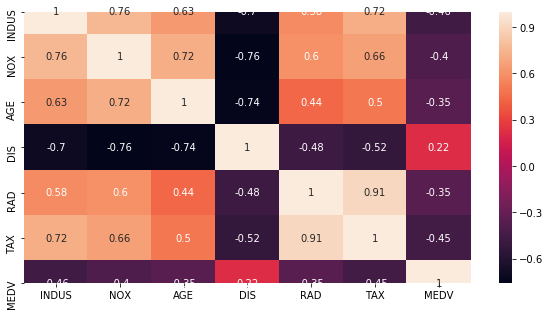

In [94]:
correlation_matrix = Data_op.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(data=correlation_matrix, annot=True)

In [95]:
data = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']]

In [96]:
# Посмотрим что изменилось 
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT']] # 
y = data['MEDV'] 
reg = LinearRegression().fit(X, y) 

print('Weights: {}'.format(reg.coef_)) 
print('Bias: {}'.format(reg.intercept_)) 

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y))) 

# Первоначальные значения - Ошибка 3,27 , Вес маленький по параметрам 
# Стало хуже. (( Ошибка 3.39 
# Ошибка стала меньше 3.25, так что , не верным было решение убрать столбец- вернули

Weights: [ 6.78936541e-02  2.71360292e-02 -3.59431898e-02  3.15344440e+00
 -1.49256165e+01  4.07785996e+00 -1.41065514e-03 -1.35175914e+00
 -8.50280899e-04 -8.48220874e-01  9.63155197e-03 -5.58938920e-01]
Bias: 29.740570740708876
Error: 3.2694746839808744


Видимо я ошибаюсь - я рассуждаю, что две переменных у которых почти линейная зависимость 0.91 ! не нужны в одном ДФ. Я думала , что они одинаково влияют на другие переменные и на наш MEDV. 
Но опыт показал обратное! 

In [97]:
# возвращаем все столбцы и работаем с выбрасами 
data = pd.read_csv(load_boston()['filename'],skiprows=1)
# Убираем из нашего дф строки , где данные CRIM >  30'
data = data.query('CRIM <  30')
# Убираем из нашего дф строки , где данные ZN >= 95
data = data.query('ZN < 95')

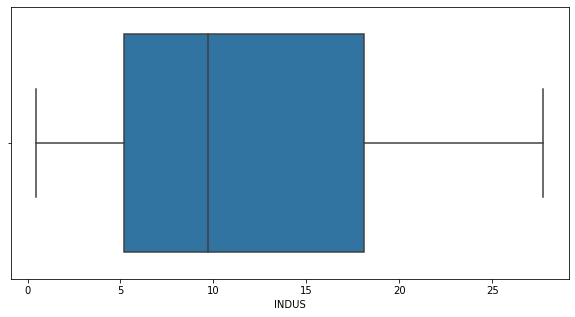

In [98]:
# Будем анализировать переменную INDUS - доля акров нефинансовго бизнеса. Корреляция с MEDV -0.47, не самая низкая. 
plt.figure(figsize=(10,5))
sns.boxplot(x=data['INDUS'])

In [99]:
data['INDUS'].value_counts()

18.10    124
19.58     30
8.14      22
6.20      18
21.89     15
        ... 
1.21       1
4.15       1
2.02       1
2.01       1
4.00       1
Name: INDUS, Length: 73, dtype: int64

In [100]:
data['INDUS'].describe()
#  В итоге пока ничего не буду делать с этой переменной

count    493.000000
mean      11.117221
std        6.830284
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64

*Мы рассматриваем дома в одном городе - зачем нам эти значения?!

In [101]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [102]:
# Я настойчиво пытаюсь найти не нужный столбец - INDUS
X = data[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT']] # 
y = data['MEDV'] 
reg = LinearRegression().fit(X, y) 

print('Weights: {}'.format(reg.coef_)) 
print('Bias: {}'.format(reg.intercept_)) 

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y))) 

# Первоначальные значения - Ошибка 3,27 , Вес маленький по параметрам  
# Ошибка после удаления выбрасов в первых двух переменных стала  меньше 3.25

Weights: [ 7.59943885e-02  2.77495834e-02  3.11438314e+00 -1.54636267e+01
  4.11263307e+00 -1.50625777e-03 -1.32428057e+00 -1.46989423e-03
 -8.54758654e-01  9.66420995e-03 -5.62438155e-01]
Bias: 29.700293066872412
Error: 3.2679449253477726


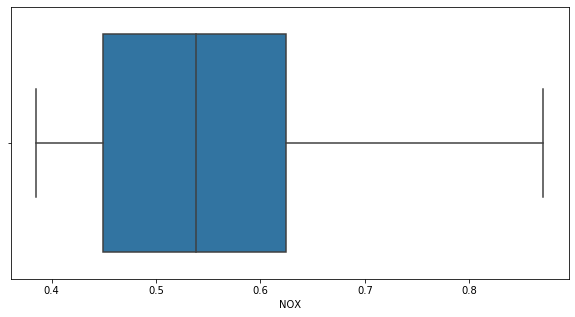

In [104]:
# Будем анализировать переменную NOX - концентрация оксида азота. Корреляция с MEDV -0.41. 
plt.figure(figsize=(10,5))
sns.boxplot(x=data['NOX'])

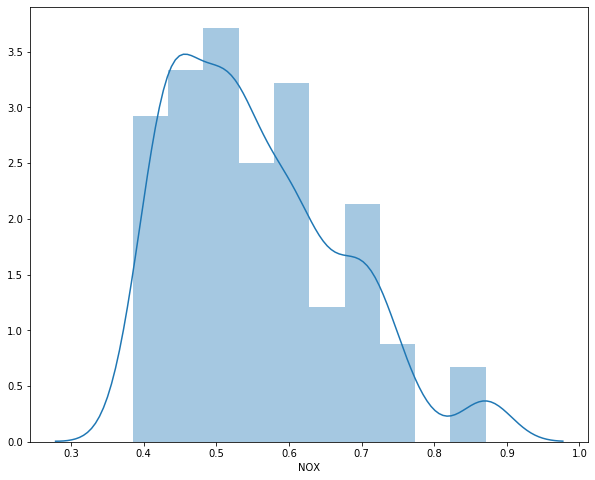

In [105]:
plt.figure(figsize=(10, 8))
sns.distplot(data['NOX'], bins=10)

In [106]:
data[data['NOX']>0.8]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
142,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
143,4.09740,0.0,19.58,0,0.871,5.468,100.0,1.4118,5,403,14.7,396.90,26.42,15.6
144,2.77974,0.0,19.58,0,0.871,4.903,97.8,1.3459,5,403,14.7,396.90,29.29,11.8
145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403,14.7,172.91,27.80,13.8
146,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6
147,2.36862,0.0,19.58,0,0.871,4.926,95.7,1.4608,5,403,14.7,391.71,29.53,14.6
148,2.33099,0.0,19.58,0,0.871,5.186,93.8,1.5296,5,403,14.7,356.99,28.32,17.8
149,2.73397,0.0,19.58,0,0.871,5.597,94.9,1.5257,5,403,14.7,351.85,21.45,15.4
150,1.65660,0.0,19.58,0,0.871,6.122,97.3,1.6180,5,403,14.7,372.80,14.10,21.5
151,1.49632,0.0,19.58,0,0.871,5.404,100.0,1.5916,5,403,14.7,341.60,13.28,19.6
